# Daily website visitors (time series regression)

Dataset Source

https://www.kaggle.com/bobnau/daily-website-visitors

Content

The variables are daily counts of page loads, unique visitors, first-time visitors, and returning visitors to an academic teaching notes website. There are 2167 rows of data spanning the date range from September 14, 2014, to August 19, 2020. A visit is defined as a stream of hits on one or more pages on the site on a given day by the same user, as identified by IP address. Multiple individuals with a shared IP address (e.g., in a computer lab) are considered as a single user, so real users may be undercounted to some extent. A visit is classified as "unique" if a hit from the same IP address has not come within the last 6 hours. Returning visitors are identified by cookies if those are accepted. All others are classified as first-time visitors, so the count of unique visitors is the sum of the counts of returning and first-time visitors by definition. The data was collected through a traffic monitoring service known as StatCounter.

Tools:

I have used Python, Pandas, Matplotlib, Seaborn, Execl, and of course Jupter Notebook to finish this project.

Purpose:

Find out the traffic pattern from past 5 years.

## Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('daily-website-visitors.csv')

In [4]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [5]:
data = data.drop(columns=['Row','Day.Of.Week'])

In [6]:
data.head()

,Day,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,9/14/2014,"2,146","1,582","1,430",152
1,Monday,9/15/2014,"3,621","2,528","2,297",231
2,Tuesday,9/16/2014,"3,698","2,630","2,352",278
3,Wednesday,9/17/2014,"3,667","2,614","2,327",287
4,Thursday,9/18/2014,"3,316","2,366","2,130",236


In [7]:
data.dtypes

Day                  object
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object

In [8]:
data["Date"] = pd.to_datetime(data.Date)
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)
data['Unique.Visits'] = data['Unique.Visits'].str.replace(',', '').astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].str.replace(',', '').astype(int)
data['Returning.Visits'] = data['Returning.Visits'].str.replace(',', '').astype(int)
data.dtypes

Day                          object
Date                 datetime64[ns]
Page.Loads                    int64
Unique.Visits                 int64
First.Time.Visits             int64
Returning.Visits              int64
dtype: object

In [9]:
data.head()

,Day,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,2014-09-14,2146,1582,1430,152
1,Monday,2014-09-15,3621,2528,2297,231
2,Tuesday,2014-09-16,3698,2630,2352,278
3,Wednesday,2014-09-17,3667,2614,2327,287
4,Thursday,2014-09-18,3316,2366,2130,236


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day                2167 non-null   object        
 1   Date               2167 non-null   datetime64[ns]
 2   Page.Loads         2167 non-null   int64         
 3   Unique.Visits      2167 non-null   int64         
 4   First.Time.Visits  2167 non-null   int64         
 5   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 101.7+ KB


## Analyzing Data

### data summary

In [11]:
data.describe()

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000
mean,4116.989386,2943.646516,2431.824181,511.822335
std,1350.977843,977.886472,828.704688,168.736370
min,1002.000000,667.000000,522.000000,133.000000
25%,3114.500000,2226.000000,1830.000000,388.500000
50%,4106.000000,2914.000000,2400.000000,509.000000
75%,5020.500000,3667.500000,3038.000000,626.500000
max,7984.000000,5541.000000,4616.000000,1036.000000


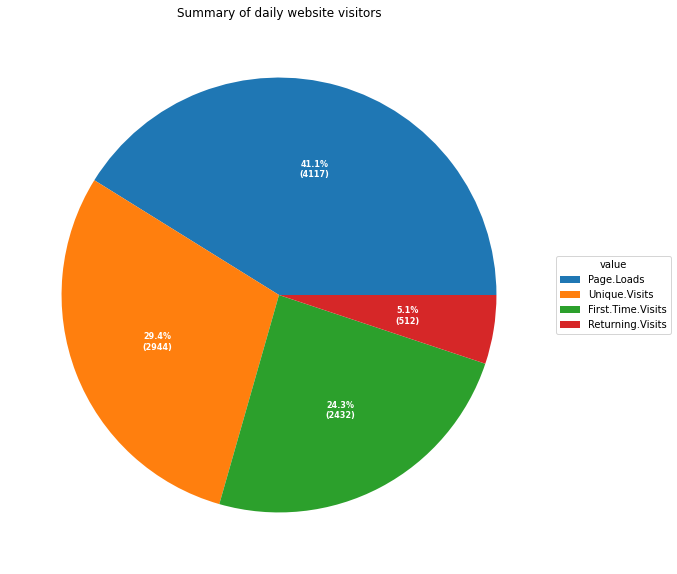

In [38]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

visits = ['4117 Page.Loads','2944 Unique.Visits','2432 First.Time.Visits','512 Returning.Visits']

data = [float(x.split()[0]) for x in visits]
value = [x.split()[-1] for x in visits]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, value,
          title="value",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Summary of daily website visitors")

plt.show()

We can clearly know that page load is the highest part. Moreover, first time visits(24.3%) is much higher than returnung visits(5.1%).

### Now we are going to figure the relationship between traffic and week of the day.

In [15]:
data = pd.read_csv('daily-website-visitors.csv')
data = data.drop(columns=['Row','Day.Of.Week'])
data["Date"] = pd.to_datetime(data.Date)
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)
data['Unique.Visits'] = data['Unique.Visits'].str.replace(',', '').astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].str.replace(',', '').astype(int)
data['Returning.Visits'] = data['Returning.Visits'].str.replace(',', '').astype(int)
data.dtypes

Day                          object
Date                 datetime64[ns]
Page.Loads                    int64
Unique.Visits                 int64
First.Time.Visits             int64
Returning.Visits              int64
dtype: object

In [17]:
sorted_day = [ 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday = data.groupby('Day').mean().reindex(sorted_day)
weekday

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Day,,,,
Sunday,3246.980645,2341.270968,1949.025806,392.245161
Monday,4845.680645,3458.425806,2858.180645,600.245161
Tuesday,4955.335484,3539.293548,2928.232258,611.061290
Wednesday,4893.916129,3502.012903,2895.490323,606.522581
Thursday,4651.355987,3327.553398,2747.317152,580.236246
Friday,3719.860841,2646.770227,2164.417476,482.352751
Saturday,2501.025890,1786.747573,1477.181230,309.566343


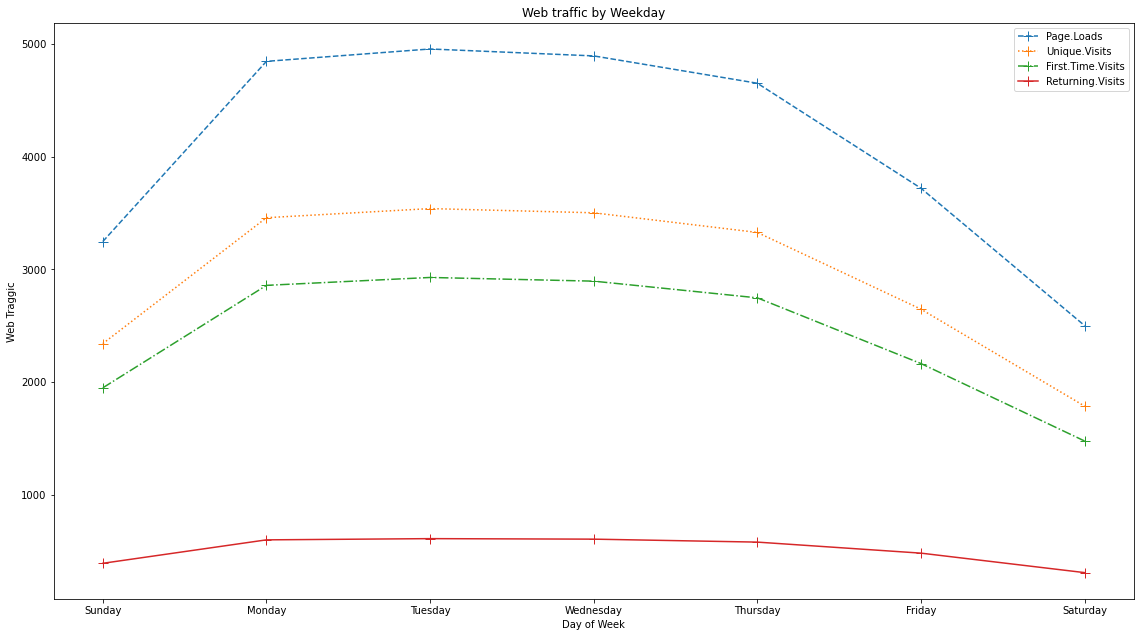

In [18]:
fig,axes = plt.subplots(figsize=(15,8))

ax = fig.add_axes([0,0,1,1])
weekday.plot(style=['--',':','-.','-'], ax=ax, marker='+', markersize=10)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Web Traggic')
ax.set_title('Web traffic by Weekday')
ax.legend(loc=0)

There is a obverse drop on Saturday. The curve starts to drop from Thursday. We can clearly know that the users tend to visit the website from Monday to Wednesday.

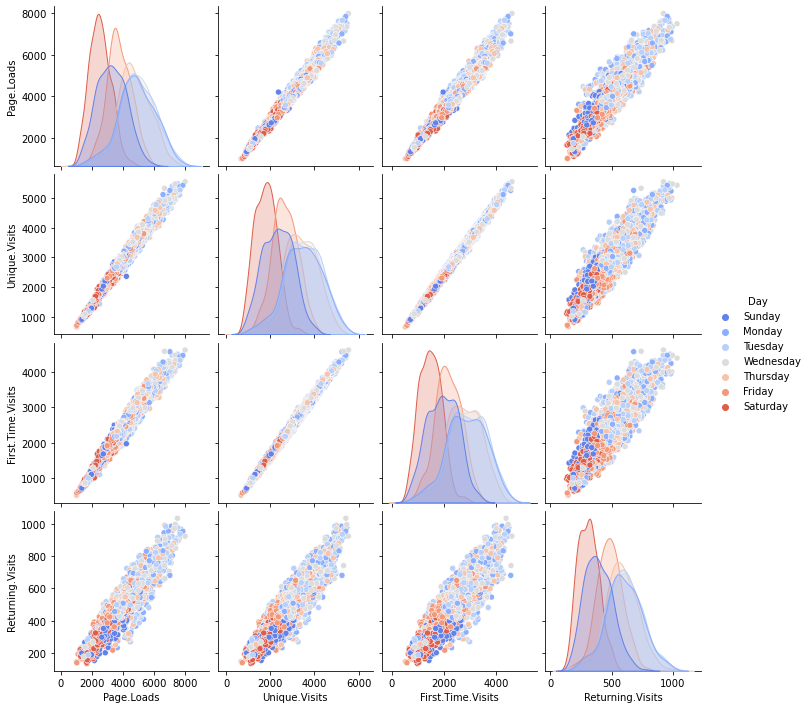

In [32]:
sns.pairplot(data, hue = 'Day',palette='coolwarm')

### Now we are going to figure the relationship of traffic and months.

In [42]:
data.Date = pd.to_datetime(data.Date)
df1 = data.resample('M', on='Date').sum()

AttributeError: 'list' object has no attribute 'Date'

In [43]:
df1

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-30,56052,39544,35542,4002
2014-10-31,121983,85569,75536,10033
2014-11-30,114190,81513,70591,10922
2014-12-31,105617,76005,64677,11328
2015-01-31,96077,66863,57010,9853
...,...,...,...,...
2020-04-30,151442,117480,100478,17002
2020-05-31,156021,121017,102424,18593
2020-06-30,124683,95716,80704,15012


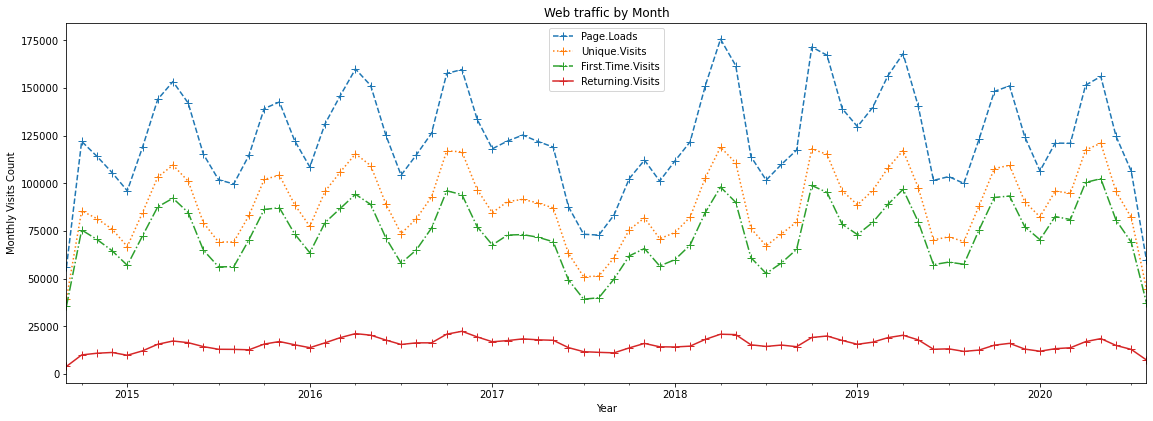

In [44]:
fig,axes = plt.subplots(figsize=(15,5))

ax = fig.add_axes([0,0,1,1])
df1.plot(style=['--',':','-.','-'], ax=ax, marker='+', markersize=8)
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Visits Count')
ax.set_title('Web traffic by Month')
ax.legend(loc=0)

We could see the there is a clearly 'M' pattern in every year, which means that the web traffic would drop in the the middle of the year.

### Now we are going to figure the relationship of traffic and years.

In [46]:
data = pd.read_csv('daily-website-visitors.csv')
data = data.drop(columns=['Row','Day.Of.Week'])
data["Date"] = pd.to_datetime(data.Date)
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)
data['Unique.Visits'] = data['Unique.Visits'].str.replace(',', '').astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].str.replace(',', '').astype(int)
data['Returning.Visits'] = data['Returning.Visits'].str.replace(',', '').astype(int)

yearly = data.resample('Y', on='Date').sum()
yearly

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-12-31,397842,282631,246346,36285
2015-12-31,1490153,1061558,888896,172662
2016-12-31,1618279,1171300,951478,219822
2017-12-31,1239604,898628,717795,180833
2018-12-31,1642681,1115124,910379,204745
2019-12-31,1586064,1115379,930623,184756
2020-12-31,946893,734262,624246,110016


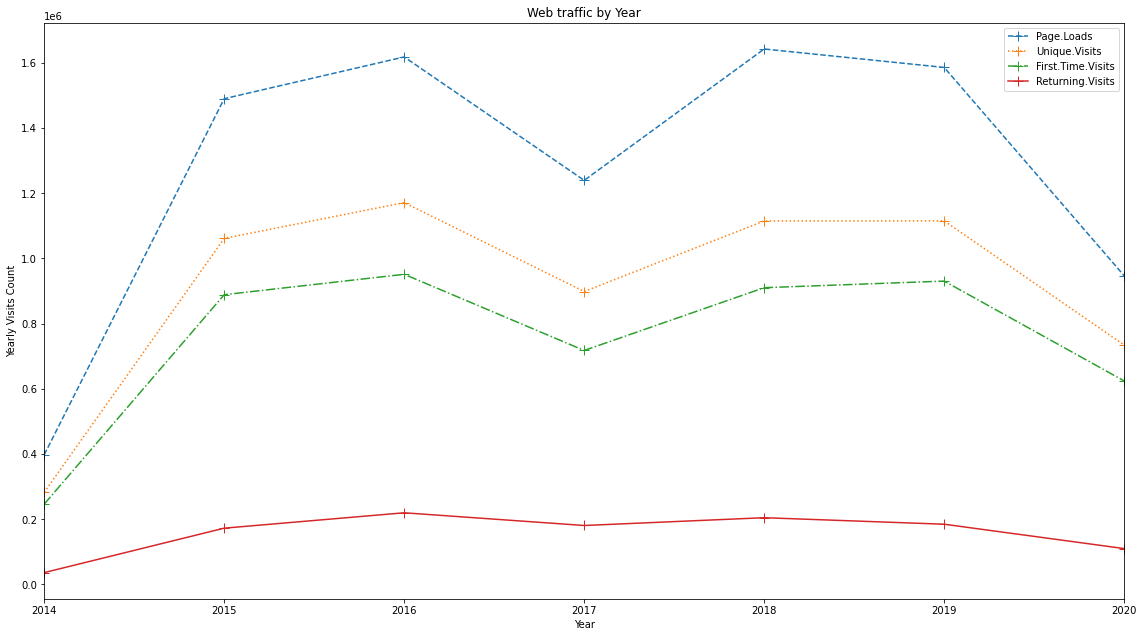

In [47]:
fig,axes = plt.subplots(figsize=(15,8))

ax = fig.add_axes([0,0,1,1])
yearly.plot(style=['--',':','-.','-'], ax=ax, marker='+', markersize=10)
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Visits Count')
ax.set_title('Web traffic by Year')
ax.legend(loc=0)

The website traffic begins increasing from 2014, but goes down in 2017, jumps back up again in the following year to where the volumes used to be, and lastly ended up with the descending pattern. As a reminder, the data range is up to August 2020, which is the typical summer break time.